### 1. Import Libraries and Load Data

In [17]:
import pandas as pd

# Load the dataset
file_path = 'Data/online_retail.csv'
try:
    df = pd.read_csv(file_path, encoding='ISO-8859-1')
    print('Dataset loaded successfully.')
except FileNotFoundError:
    print(f'Error: The file was not found at {file_path}')

Dataset loaded successfully.


### 2. Initial Data Exploration

In [18]:
# Display the first 5 rows of the dataframe
df.head()

# Display the last 5 rows of the dataframe
#df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [19]:
# Get a concise summary of the dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [22]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"After dropping duplicates: {df.shape}")

After dropping duplicates: (797885, 8)


In [23]:
# Drop rows with missing Customer ID, then convert to int
missing_cust = df['Customer ID'].isnull().sum()
print(f"Rows with missing Customer ID: {missing_cust}")
df = df.dropna(subset=['Customer ID'])
df['Customer ID'] = df['Customer ID'].astype(int)

Rows with missing Customer ID: 0


In [24]:
# Remove cancelled invoices (Invoice starts with 'C')
cancelled = df['Invoice'].astype(str).str.startswith('C').sum()
print(f"Cancelled invoices: {cancelled}")
df = df[~df['Invoice'].astype(str).str.startswith('C')]

Cancelled invoices: 18390


In [25]:
# Remove rows where Price is zero
zero_price = (df['Price'] == 0).sum()
print(f"Rows with Price == 0: {zero_price}")
df = df[df['Price'] > 0]

Rows with Price == 0: 70


In [26]:
# Remove non-product StockCodes
non_product_codes = ['POST', 'D', 'M', 'BANK CHARGES', 'PADS', 'C2', 'DOT']
mask = ~df['StockCode'].isin(non_product_codes)
print(f"Non-product rows removed: {(~mask).sum()}")
df = df[mask]

Non-product rows removed: 2801


In [27]:
# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['Price']

In [28]:
# Add Year and Month columns
df['Year'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month

In [29]:
# Print final data types
print(df.dtypes)

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID      int64
Country         object
TotalPrice     float64
Year             int32
Month            int32
dtype: object


### 3. Data Cleaning and Preprocessing

In [30]:
# Check for missing values
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
Year           0
Month          0
dtype: int64

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('Data/online_retail_cleaned.csv', parse_dates=['invoicedate'])

# --- Feature Engineering: Create a 'revenue' column ---
# This is a crucial step for many analyses.
df['revenue'] = df['quantity'] * df['price']

print("Cleaned data loaded and 'revenue' column created.")
df.head()

Cleaned data loaded and 'revenue' column created.


,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0


Top 10 Best-Selling Products (by quantity):
description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
WHITE HANGING HEART T-LIGHT HOLDER     91757
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          78234
MEDIUM CERAMIC TOP STORAGE JAR         77916
JUMBO BAG RED RETROSPOT                74224
BROCADE RING PURSE                     70082
PACK OF 60 PINK PAISLEY CAKE CASES     54592
60 TEATIME FAIRY CAKE CASES            52828
PACK OF 72 RETRO SPOT CAKE CASES       45129
Name: quantity, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_7808\3093306879.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


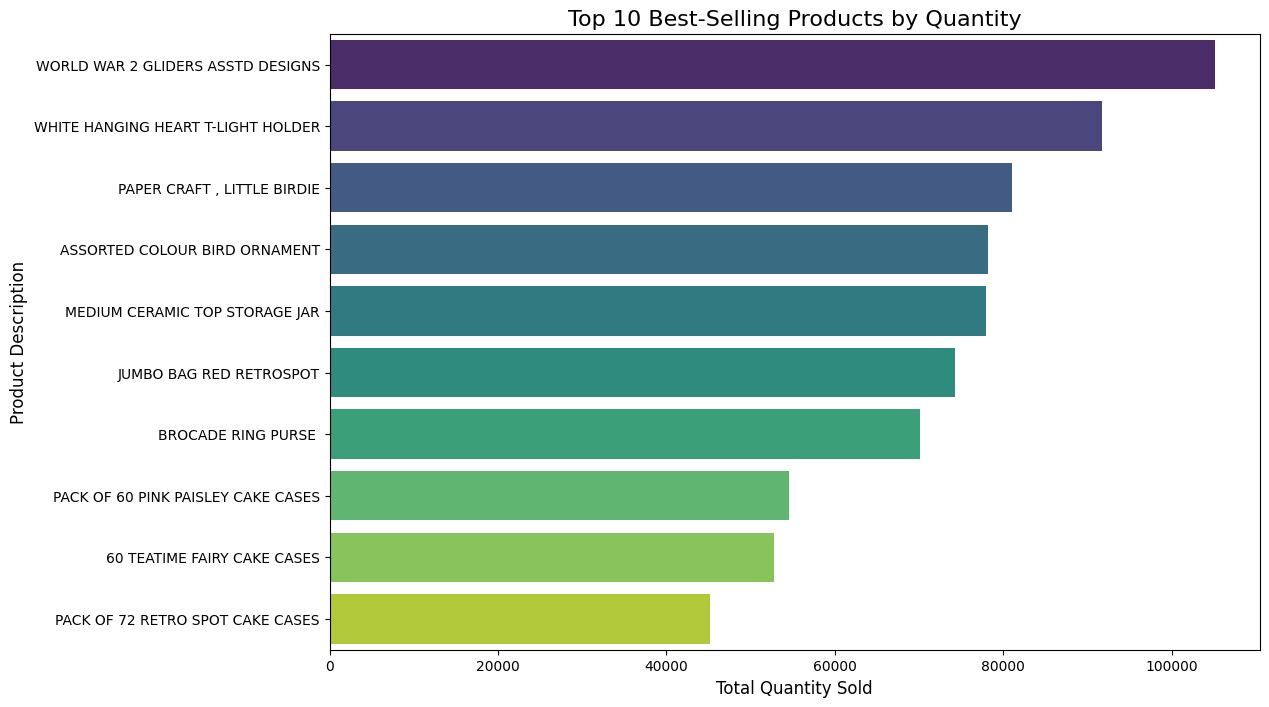

In [33]:
# --- 1. Top 10 Best-Selling Products ---

# Group by product description and sum the quantities to find the best-sellers
top_products = df.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)

print("Top 10 Best-Selling Products (by quantity):")
print(top_products)

# --- Visualize the results ---
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Best-Selling Products by Quantity', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.show()

In [34]:
print(df.columns)

Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country', 'revenue'],
      dtype='object')


In [35]:
# --- UK vs. Rest-of-World Revenue Percentage ---
uk_revenue = df[df['country'] == 'United Kingdom']['revenue'].sum()
non_uk_revenue = df[df['country'] != 'United Kingdom']['revenue'].sum()
total_revenue = df['revenue'].sum()

uk_pct = uk_revenue / total_revenue * 100
non_uk_pct = non_uk_revenue / total_revenue * 100

print(f"UK Revenue: £{uk_revenue:,.2f} ({uk_pct:.1f}%)")
print(f"Rest of World Revenue: £{non_uk_revenue:,.2f} ({non_uk_pct:.1f}%)")

UK Revenue: £14,389,234.92 (82.8%)
Rest of World Revenue: £2,985,569.35 (17.2%)


In [36]:
# --- Top 10 Products by Total Revenue ---
top_products_revenue = (
    df.groupby('description')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 Best-Selling Products (by total revenue):")
print(top_products_revenue)


Top 10 Best-Selling Products (by total revenue):
description
REGENCY CAKESTAND 3 TIER              277656.25
WHITE HANGING HEART T-LIGHT HOLDER    247048.01
PAPER CRAFT , LITTLE BIRDIE           168469.60
Manual                                151777.67
JUMBO BAG RED RETROSPOT               134307.44
POSTAGE                               124648.04
ASSORTED COLOUR BIRD ORNAMENT         124351.86
PARTY BUNTING                         103283.38
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
PAPER CHAIN KIT 50'S CHRISTMAS         76598.18
Name: revenue, dtype: float64


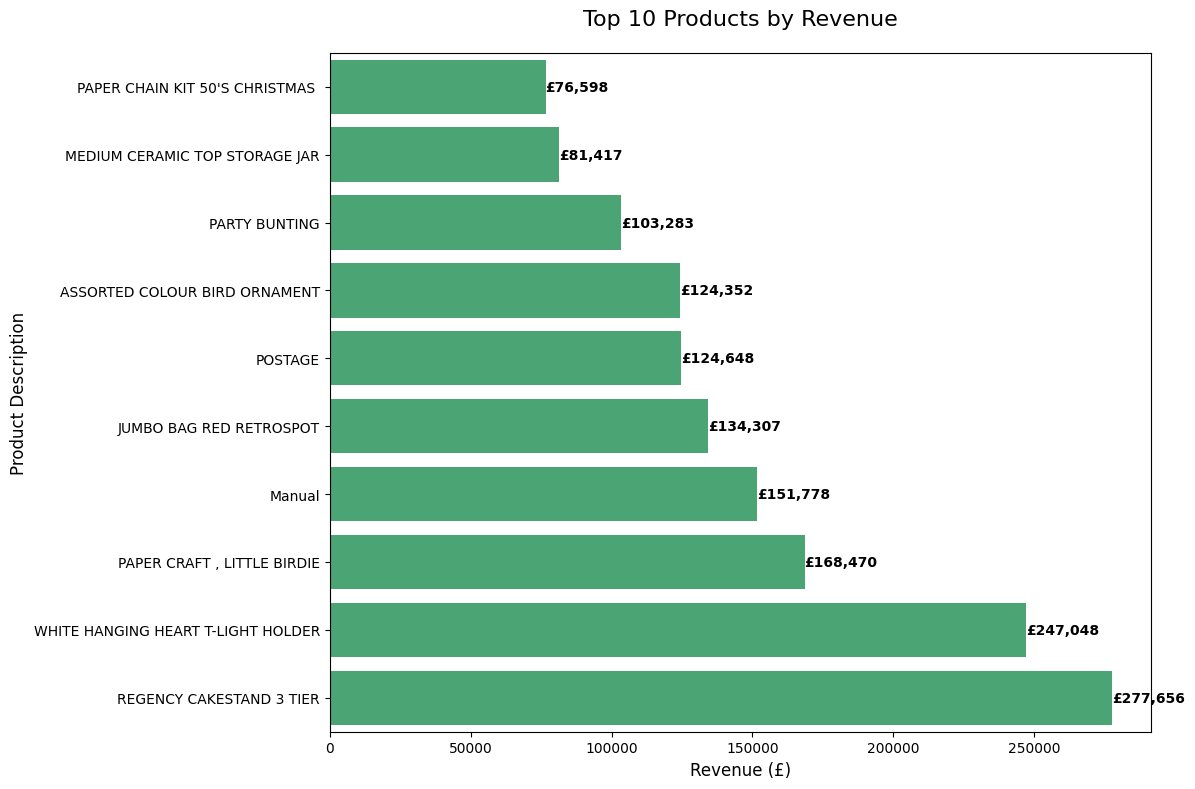


Top 10 Best-Selling Products (by total revenue):
PAPER CHAIN KIT 50'S CHRISTMAS : £76,598.18
MEDIUM CERAMIC TOP STORAGE JAR: £81,416.73
PARTY BUNTING: £103,283.38
ASSORTED COLOUR BIRD ORNAMENT: £124,351.86
POSTAGE: £124,648.04
JUMBO BAG RED RETROSPOT: £134,307.44
Manual: £151,777.67
PAPER CRAFT , LITTLE BIRDIE: £168,469.60
WHITE HANGING HEART T-LIGHT HOLDER: £247,048.01
REGENCY CAKESTAND 3 TIER: £277,656.25


In [37]:
# Top 10 Products by Total Revenue Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded with revenue column
# Create the revenue analysis
top_products_revenue = (
    df.groupby('description')['revenue']
    .sum()
    .sort_values(ascending=True)  # Ascending for horizontal bar chart
    .tail(10)  # Get top 10
)

# Create figure with larger size for better readability
plt.figure(figsize=(12, 8))

# Create horizontal bar chart
sns.barplot(x=top_products_revenue.values, 
            y=top_products_revenue.index,
            color='mediumseagreen')

# Customize the chart
plt.title('Top 10 Products by Revenue', fontsize=16, pad=20)
plt.xlabel('Revenue (£)', fontsize=12)
plt.ylabel('Product Description', fontsize=12)

# Add revenue values on the bars
for i, v in enumerate(top_products_revenue.values):
    plt.text(v, i, f'£{v:,.0f}', 
             va='center',
             fontsize=10,
             fontweight='bold')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# Print the numerical values
print("\nTop 10 Best-Selling Products (by total revenue):")
for product, revenue in top_products_revenue.items():
    print(f"{product}: £{revenue:,.2f}")

In [38]:
# --- Compare Top 10 by Quantity vs. Revenue ---
top_products_quantity = df.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)

print("\nProducts in Top 10 by Quantity but NOT by Revenue:")
print(set(top_products_quantity.index) - set(top_products_revenue.index))

print("\nProducts in Top 10 by Revenue but NOT by Quantity:")
print(set(top_products_revenue.index) - set(top_products_quantity.index))


Products in Top 10 by Quantity but NOT by Revenue:
{'60 TEATIME FAIRY CAKE CASES', 'BROCADE RING PURSE ', 'PACK OF 60 PINK PAISLEY CAKE CASES', 'WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'PACK OF 72 RETRO SPOT CAKE CASES'}

Products in Top 10 by Revenue but NOT by Quantity:
{'PARTY BUNTING', 'REGENCY CAKESTAND 3 TIER', 'POSTAGE', "PAPER CHAIN KIT 50'S CHRISTMAS ", 'Manual'}


### Analysis of Top Products

- **Top 10 by Quantity but NOT by Revenue**  
  These products sell in large numbers but are low in price:
  - PACK OF 72 RETRO SPOT CAKE CASES
  - 60 TEATIME FAIRY CAKE CASES
  - BROCADE RING PURSE
  - PACK OF 60 PINK PAISLEY CAKE CASES
  - WORLD WAR 2 GLIDERS ASSTD DESIGNS

- **Top 10 by Revenue but NOT by Quantity**  
  These products sell less frequently but have a high price, driving revenue:
  - Manual
  - REGENCY CAKESTAND 3 TIER
  - PAPER CHAIN KIT 50'S CHRISTMAS
  - PARTY BUNTING
  - POSTAGE


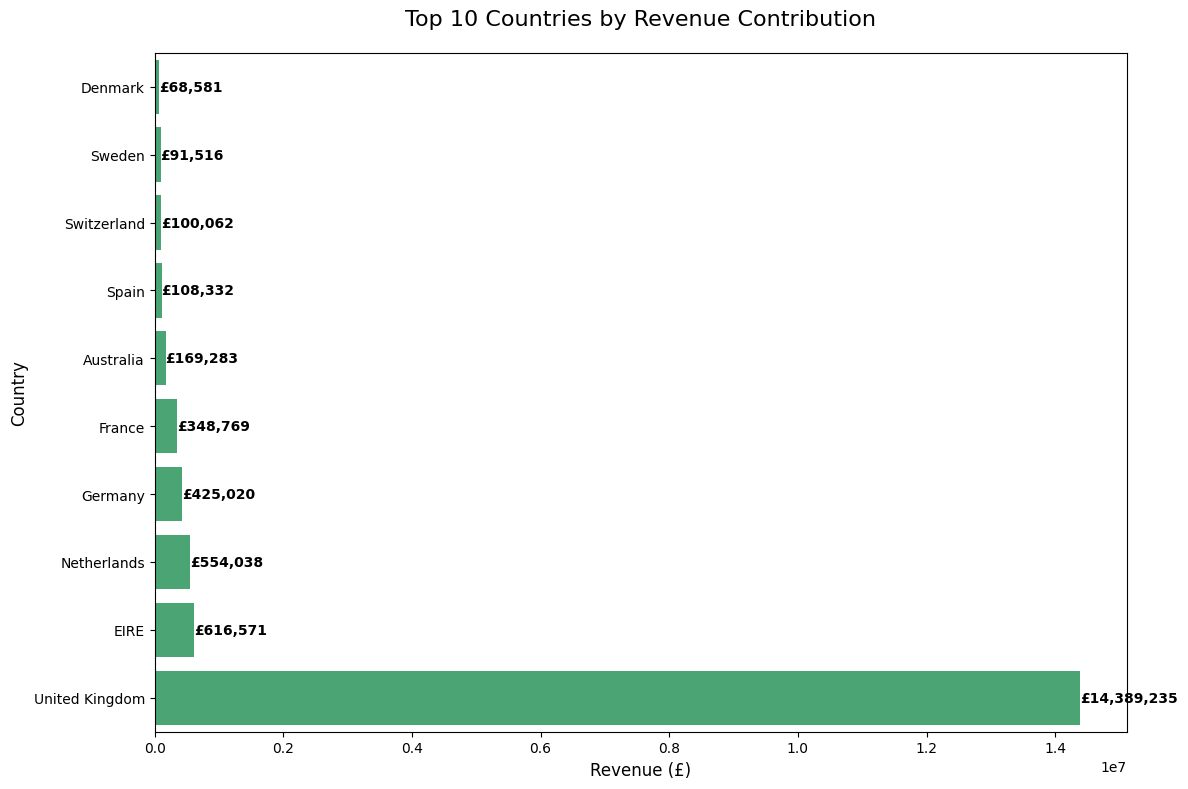


Revenue Contribution by Country:
Denmark: £68,580.69 (0.4%)
Sweden: £91,515.82 (0.5%)
Switzerland: £100,061.94 (0.6%)
Spain: £108,332.49 (0.6%)
Australia: £169,283.46 (1.0%)
France: £348,768.96 (2.0%)
Germany: £425,019.71 (2.4%)
Netherlands: £554,038.09 (3.2%)
EIRE: £616,570.54 (3.5%)
United Kingdom: £14,389,234.92 (82.8%)


In [39]:
# Geographic Revenue Analysis with Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate revenue by country
country_revenue = df.groupby('country')['revenue'].sum().sort_values(ascending=True)

# Get top 10 countries
top_10_countries = country_revenue.tail(10)  # Using tail since we'll plot ascending

# Create a figure with larger size
plt.figure(figsize=(12, 8))

# Create bar chart with single color to avoid FutureWarning
sns.barplot(x=top_10_countries.values, 
            y=top_10_countries.index,
            color='mediumseagreen')  # use 'color' instead of 'palette'

# Add title and labels with improved formatting
plt.title('Top 10 Countries by Revenue Contribution', fontsize=16, pad=20)
plt.xlabel('Revenue (£)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add revenue values on the bars
for i, v in enumerate(top_10_countries.values):
    plt.text(v, i, f'£{v:,.0f}', 
             va='center', 
             fontsize=10,
             fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print percentage contribution
print("\nRevenue Contribution by Country:")
for country, rev in top_10_countries.items():
    percentage = (rev / country_revenue.sum()) * 100
    print(f"{country}: £{rev:,.2f} ({percentage:.1f}%)")

Total Revenue per Month:
invoicedate
2009-12-31     683504.010
2010-01-31     555802.672
2010-02-28     504558.956
2010-03-31     696978.471
2010-04-30     591982.002
2010-05-31     597833.380
2010-06-30     636371.130
2010-07-31     589736.170
2010-08-31     602224.600
2010-09-30     829013.951
2010-10-31    1033112.010
2010-11-30    1166460.022
2010-12-31     570422.730
2011-01-31     568101.310
2011-02-28     446084.920
2011-03-31     594081.760
2011-04-30     468374.331
2011-05-31     677355.150
2011-06-30     660046.050
2011-07-31     598962.901
2011-08-31     644051.040
2011-09-30     950690.202
2011-10-31    1035642.450
2011-11-30    1156205.610
2011-12-31     517208.440
Freq: ME, Name: revenue, dtype: float64


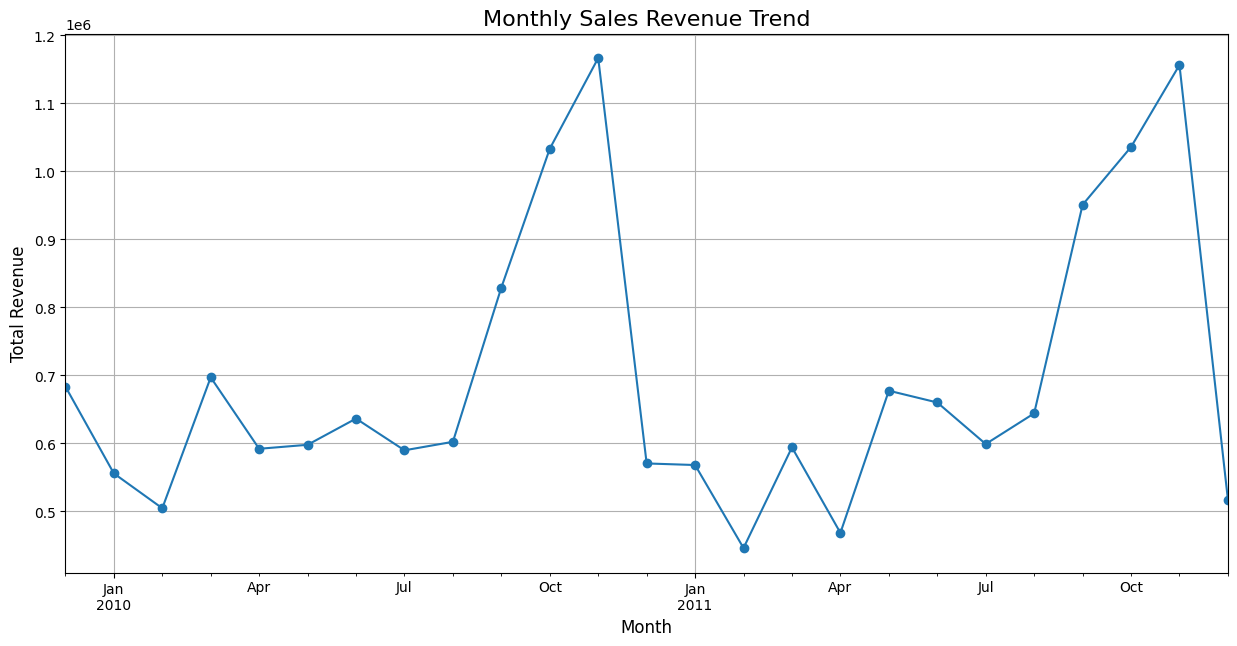

In [40]:
# --- 3. Monthly Sales Trend ---

# To analyze trends over time, we'll set 'invoicedate' as the DataFrame index.
df_time_series = df.set_index('invoicedate')

# Resample the data by month ('ME' stands for Month-End) and sum the revenue for each month.
monthly_revenue = df_time_series['revenue'].resample('ME').sum()

print("Total Revenue per Month:")
print(monthly_revenue)

# --- Visualize the trend ---
plt.figure(figsize=(15, 7))
monthly_revenue.plot(kind='line', marker='o', linestyle='-')
plt.title('Monthly Sales Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True)
plt.show()

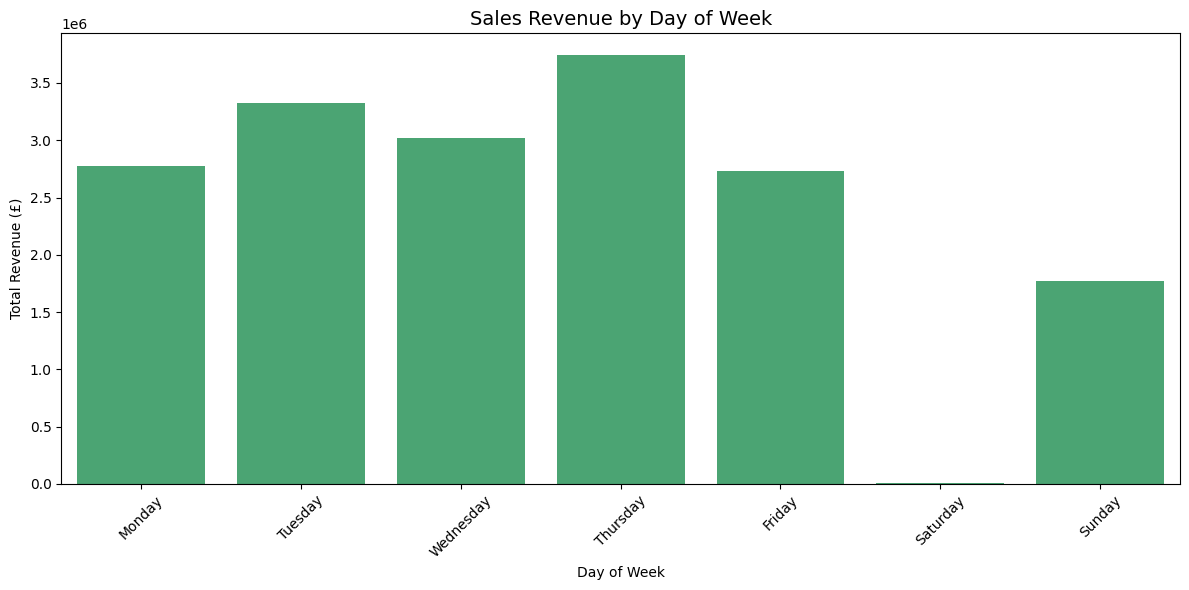

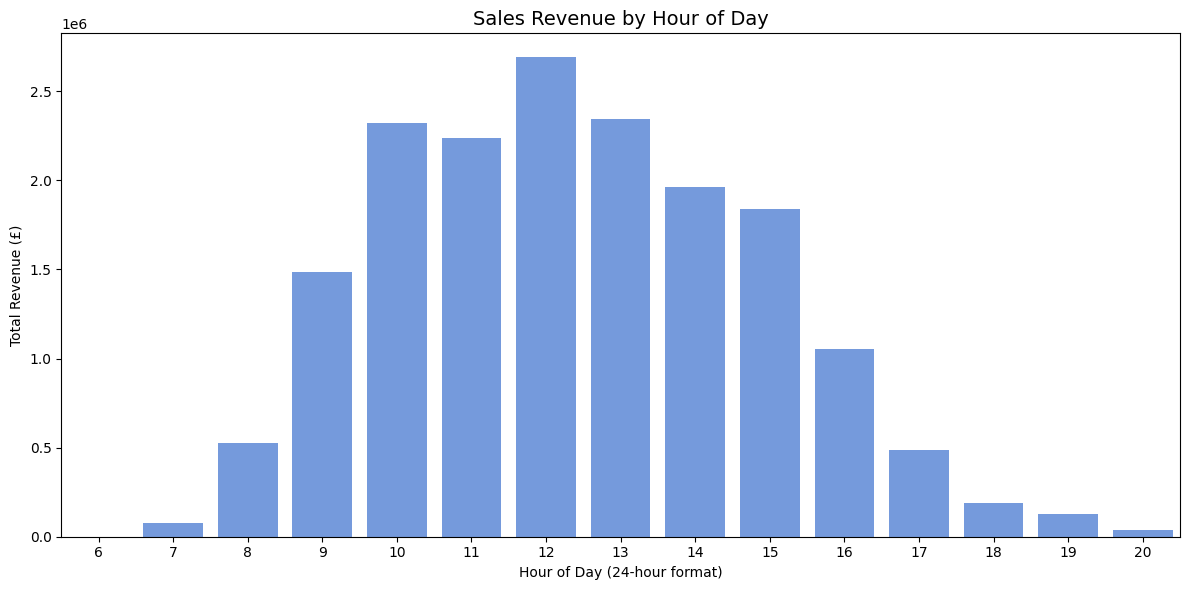

In [41]:
# Time-based Analysis: Day of Week & Hour of Day
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Data/online_retail_cleaned.csv', parse_dates=['invoicedate'])
df['revenue'] = df['quantity'] * df['price']

# Extract day of week and hour
df['DayOfWeek'] = df['invoicedate'].dt.day_name()
df['HourOfDay'] = df['invoicedate'].dt.hour

# -----------------------------
# 1. Day of Week Analysis
# -----------------------------
plt.figure(figsize=(12, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales = df.groupby('DayOfWeek')['revenue'].sum().reindex(day_order)

# Fixed Seaborn warning: use color instead of palette (single color)
sns.barplot(x=daily_sales.index, y=daily_sales.values, color='mediumseagreen')

plt.title('Sales Revenue by Day of Week', fontsize=14)
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 2. Hour of Day Analysis
# -----------------------------
plt.figure(figsize=(12, 6))
hourly_sales = df.groupby('HourOfDay')['revenue'].sum()

# Fixed Seaborn warning: use color instead of palette (single color)
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, color='cornflowerblue')

plt.title('Sales Revenue by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Total Revenue (£)')
plt.tight_layout()
plt.show()

Top 10 Most Valuable Customers (by total revenue):
customer_id
18102    580987.04
14646    528602.52
14156    313437.62
14911    291420.81
17450    244784.25
13694    195640.69
17511    172132.87
16446    168472.50
16684    147142.77
12415    144458.37
Name: revenue, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_7808\276654612.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette='cividis', orient='h')


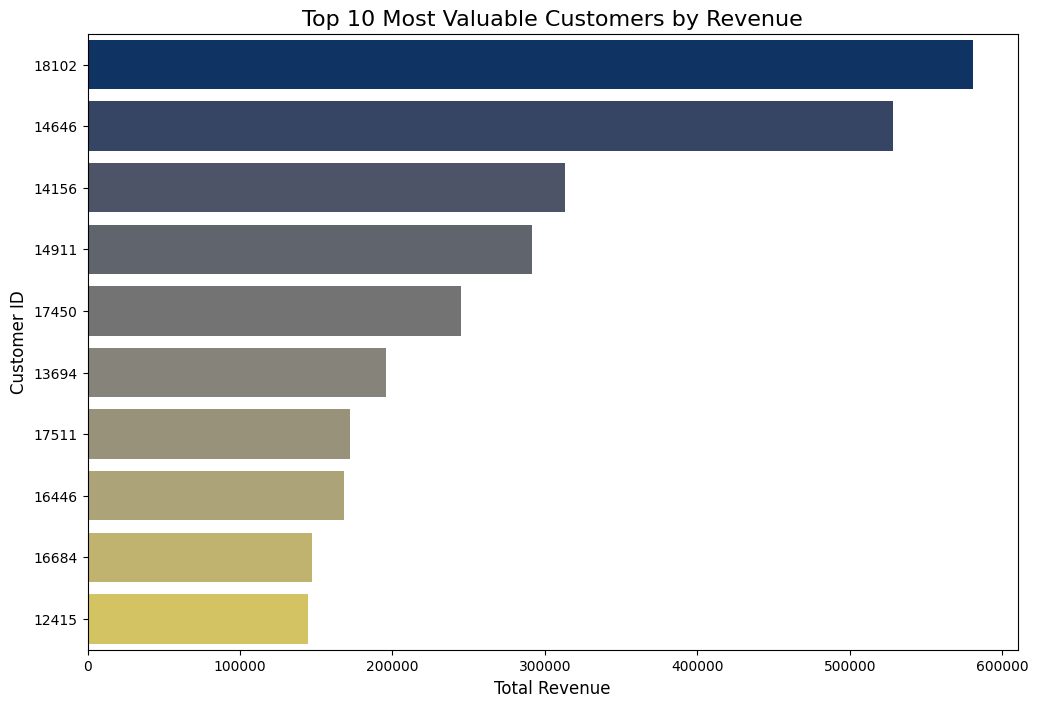

In [42]:
# --- 4. Top 10 Most Valuable Customers ---

# Group by customer ID and sum the revenue
top_customers = df.groupby('customer_id')['revenue'].sum().sort_values(ascending=False).head(10)

print("Top 10 Most Valuable Customers (by total revenue):")
print(top_customers)

# --- Visualize the results ---
plt.figure(figsize=(12, 8))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette='cividis', orient='h')
plt.title('Top 10 Most Valuable Customers by Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)
plt.show()

In [43]:
# --- RFM Analysis ---
import datetime as dt
snapshot_date = df['invoicedate'].max() + dt.timedelta(days=1)

rfm_data = df.groupby('customer_id').agg({
    'invoicedate': lambda date: (snapshot_date - date.max()).days,  # Recency
    'invoice': 'nunique',                                           # Frequency
    'revenue': 'sum'                                                # Monetary
})

rfm_data.rename(columns={'invoicedate': 'Recency',
                         'invoice': 'Frequency',
                         'revenue': 'MonetaryValue'}, inplace=True)

In [47]:
# --- Create RFM Scores using Quintiles (1–5) ---
r_labels = range(5, 0, -1)  # 5 = most recent
f_labels = range(1, 6)      # 5 = most frequent
m_labels = range(1, 6)      # 5 = highest monetary value

rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], q=5, labels=r_labels, duplicates='drop')
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), q=5, labels=f_labels)
rfm_data['M_Score'] = pd.qcut(rfm_data['MonetaryValue'], q=5, labels=m_labels, duplicates='drop')

# --- Combine scores into a single RFM score ---
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + \
                        rfm_data['F_Score'].astype(str) + \
                        rfm_data['M_Score'].astype(str)

In [48]:
# --- RFM Analysis ---
#Phase 4
# To calculate Recency, we need a 'snapshot' date. We'll use the day after the last transaction date in our dataset.
import datetime as dt
snapshot_date = df['invoicedate'].max() + dt.timedelta(days=1)

# Calculate Recency, Frequency, and Monetary values for each customer
rfm_data = df.groupby('customer_id').agg({
    'invoicedate': lambda date: (snapshot_date - date.max()).days,  # Recency: days since last purchase
    'invoice': 'nunique',                                           # Frequency: count of unique invoices
    'revenue': 'sum'                                                # Monetary: total revenue
})

# Rename the columns to be more descriptive
rfm_data.rename(columns={'invoicedate': 'Recency',
                         'invoice': 'Frequency',
                         'revenue': 'MonetaryValue'}, inplace=True)

print("RFM Data Calculated:")
rfm_data.head()

RFM Data Calculated:


,Recency,Frequency,MonetaryValue
customer_id,,,
12346,326,12,77556.46
12347,2,8,4921.53
12348,75,5,2019.40
12349,19,4,4428.69
12350,310,1,334.40


In [51]:
# --- Create RFM Scores ---

# Create labels for the scores (1=worst, 4=best)
r_labels = range(4, 0, -1) # For Recency, lower is better, so we reverse the labels
f_labels = range(1, 5)    # For Frequency, higher is better
m_labels = range(1, 5)    # For Monetary, higher is better

# Use qcut with rank(method='first') for Frequency to handle the large number of one-time buyers,
# and duplicates='drop' for Recency and Monetary to handle other non-unique bin edges.
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], q=4, labels=r_labels, duplicates='drop')
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), q=4, labels=f_labels)
rfm_data['M_Score'] = pd.qcut(rfm_data['MonetaryValue'], q=4, labels=m_labels, duplicates='drop')


# --- Combine scores into a single RFM score ---
# This makes it easy to create segments
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

print("RFM Scores Calculated:")
rfm_data.head()

RFM Scores Calculated:


,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFM_Score
customer_id,,,,,,,
12346,326,12,77556.46,2,4,4,244
12347,2,8,4921.53,4,4,4,444
12348,75,5,2019.40,3,3,3,333
12349,19,4,4428.69,4,3,4,434
12350,310,1,334.40,2,1,1,211


Customer Segments Created:
             Recency  Frequency  MonetaryValue R_Score F_Score M_Score  \
customer_id                                                              
12346            326         12       77556.46       2       4       4   
12347              2          8        4921.53       4       4       4   
12348             75          5        2019.40       3       3       3   
12349             19          4        4428.69       4       3       4   
12350            310          1         334.40       2       1       1   

            RFM_Score              Segment  
customer_id                                 
12346             244    At-Risk Customers  
12347             444            Champions  
12348             333  Potential Loyalists  
12349             434            Champions  
12350             211          Hibernating  


C:\Users\user\AppData\Local\Temp\ipykernel_7808\3640602342.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='rocket')


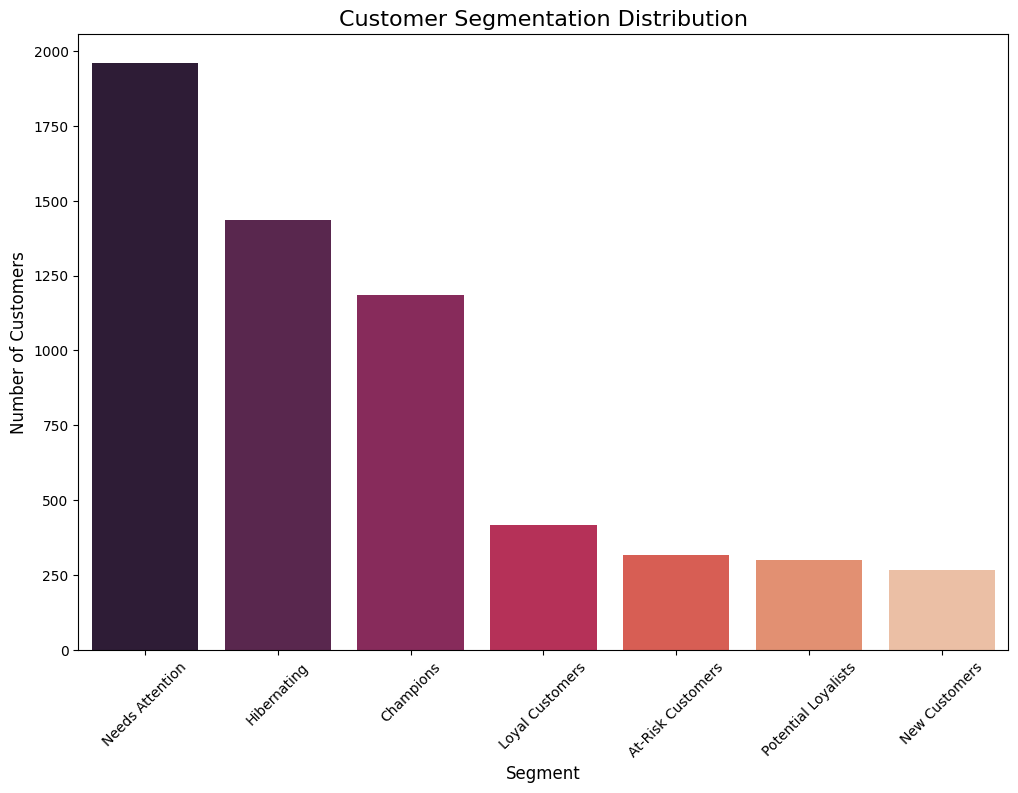

In [52]:
# --- Create Customer Segments from RFM Scores ---

# Define a function to map RFM scores to segment names
def rfm_segment(df):
    if df['RFM_Score'] in ['444', '443', '434', '344']:
        return 'Champions'
    elif df['RFM_Score'] in ['343', '334', '342', '433']:
        return 'Loyal Customers'
    elif df['RFM_Score'] in ['424', '423', '333', '324']:
        return 'Potential Loyalists'
    elif df['RFM_Score'] in ['411', '412', '421', '422']:
        return 'New Customers'
    elif df['RFM_Score'] in ['244', '243', '234', '144', '143', '134']:
        return 'At-Risk Customers'
    elif df['RFM_Score'] in ['111', '112', '121', '122', '211', '212']:
        return 'Hibernating'
    else:
        return 'Needs Attention'

# Apply the function to create the 'Segment' column
rfm_data['Segment'] = rfm_data.apply(rfm_segment, axis=1)

print("Customer Segments Created:")
print(rfm_data.head())

# --- Visualize the distribution of customer segments ---
segment_counts = rfm_data['Segment'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='rocket')
plt.title('Customer Segmentation Distribution', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

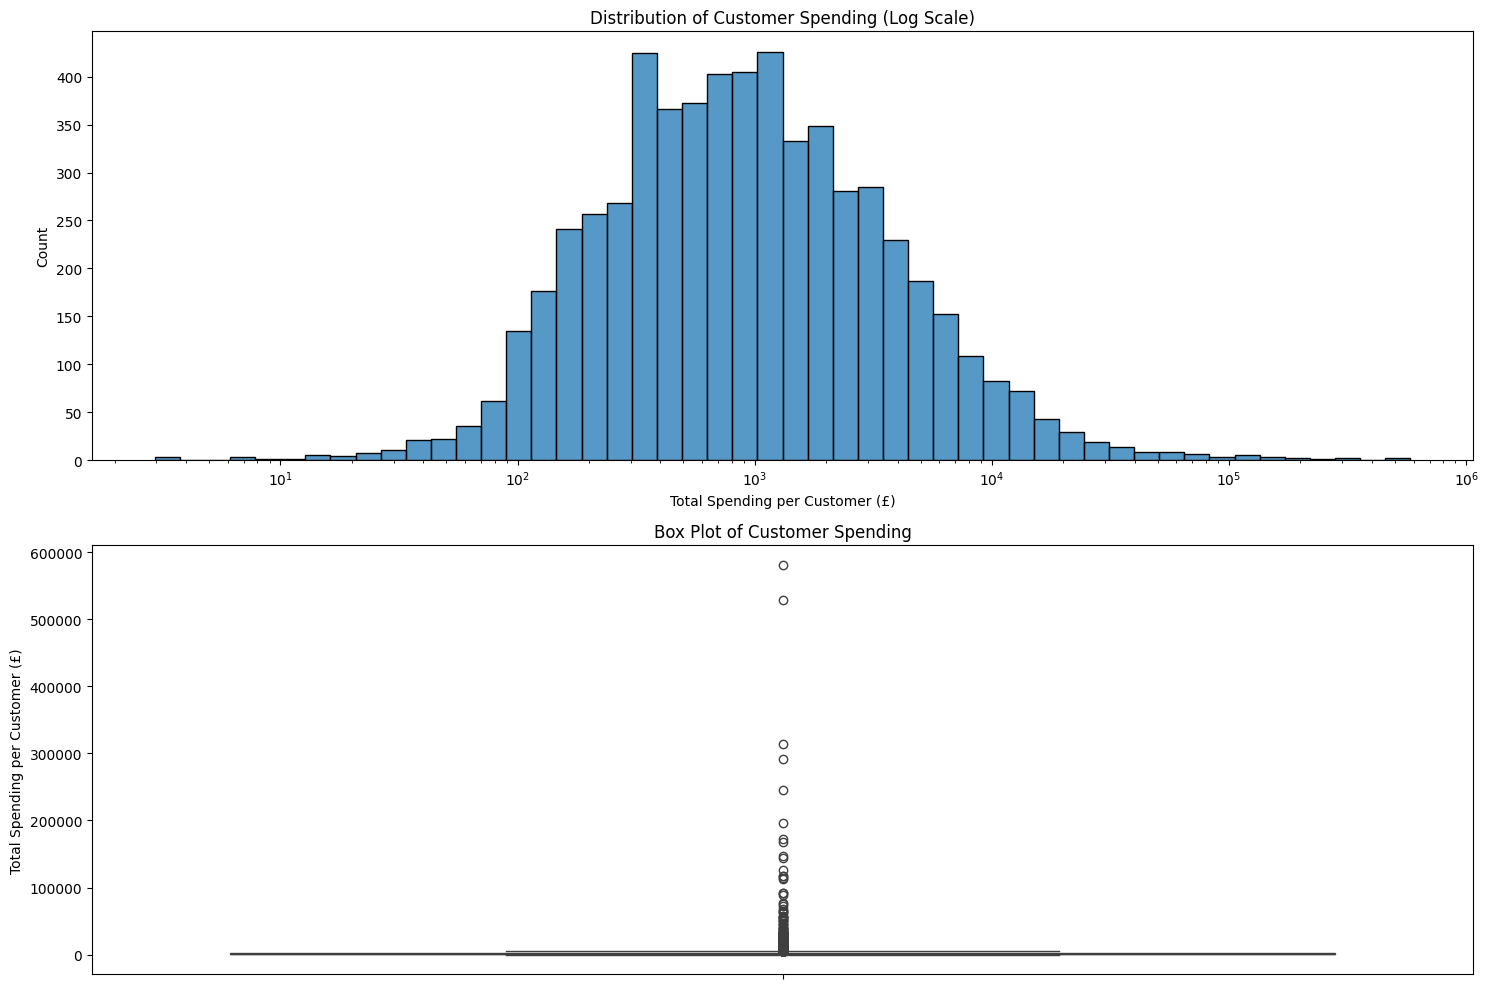


Wholesaler Analysis Results:
Average customer spending: £2,955.90
Median customer spending: £867.74
90th percentile spending: £5,465.74
Number of potential wholesalers: 588

Comparison of Average Quantity per Transaction:
Average quantity for regular customers: 8.66
Average quantity for potential wholesalers: 19.55


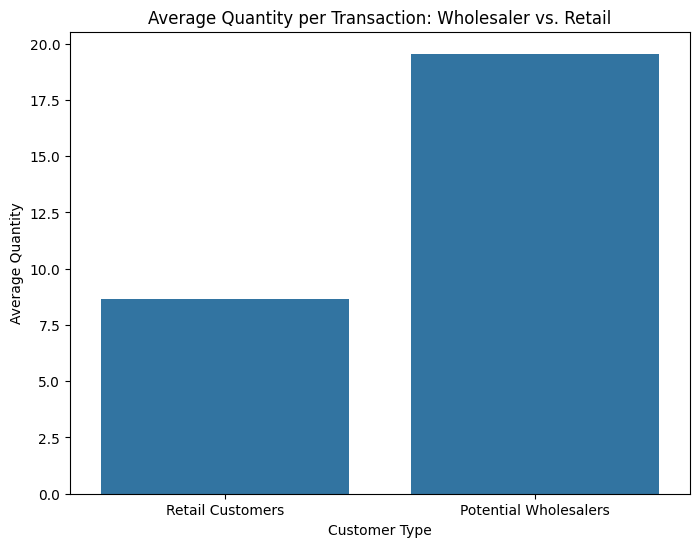

In [53]:
# Phase 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_wholesaler_hypothesis(df):
    """Analyze customer spending patterns to identify wholesalers vs retail customers"""

    # Calculate total monetary value per customer
    customer_monetary = df.groupby('customer_id')['revenue'].sum()

    # Create visualizations
    plt.figure(figsize=(15, 10))

    # 1. Histogram of monetary values
    plt.subplot(2, 1, 1)
    sns.histplot(customer_monetary, bins=50, log_scale=True)
    plt.title('Distribution of Customer Spending (Log Scale)')
    plt.xlabel('Total Spending per Customer (£)')
    plt.ylabel('Count')

    # 2. Box plot
    plt.subplot(2, 1, 2)
    sns.boxplot(y=customer_monetary)
    plt.title('Box Plot of Customer Spending')
    plt.ylabel('Total Spending per Customer (£)')

    plt.tight_layout()
    plt.show()

    # Calculate statistics
    stats = {
        'mean_spending': customer_monetary.mean(),
        'median_spending': customer_monetary.median(),
        'spending_90th_percentile': customer_monetary.quantile(0.9),
        'potential_wholesalers': (customer_monetary > customer_monetary.quantile(0.9)).sum()
    }

    return stats, customer_monetary

# Load and prepare data
df = pd.read_csv('Data/online_retail_cleaned.csv', parse_dates=['invoicedate'])
df['revenue'] = df['quantity'] * df['price']

# Run analysis
stats, customer_monetary = analyze_wholesaler_hypothesis(df)

# Print findings
print("\nWholesaler Analysis Results:")
print(f"Average customer spending: £{stats['mean_spending']:,.2f}")
print(f"Median customer spending: £{stats['median_spending']:,.2f}")
print(f"90th percentile spending: £{stats['spending_90th_percentile']:,.2f}")
print(f"Number of potential wholesalers: {stats['potential_wholesalers']}")

# --- Further Analysis: Compare Wholesaler vs. Retail Behavior ---

# Create a boolean flag to identify wholesalers in the main DataFrame
wholesaler_threshold = customer_monetary.quantile(0.9)
df['is_wholesaler'] = df['customer_id'].isin(customer_monetary[customer_monetary > wholesaler_threshold].index)

# Compare the average quantity per transaction line
avg_quantity_comparison = df.groupby('is_wholesaler')['quantity'].mean()

print("\nComparison of Average Quantity per Transaction:")
print(f"Average quantity for regular customers: {avg_quantity_comparison[False]:.2f}")
print(f"Average quantity for potential wholesalers: {avg_quantity_comparison[True]:.2f}")

# Visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_quantity_comparison.index, y=avg_quantity_comparison.values)
plt.title('Average Quantity per Transaction: Wholesaler vs. Retail')
plt.ylabel('Average Quantity')
plt.xlabel('Customer Type')
plt.xticks([0, 1], ['Retail Customers', 'Potential Wholesalers'])
plt.show()

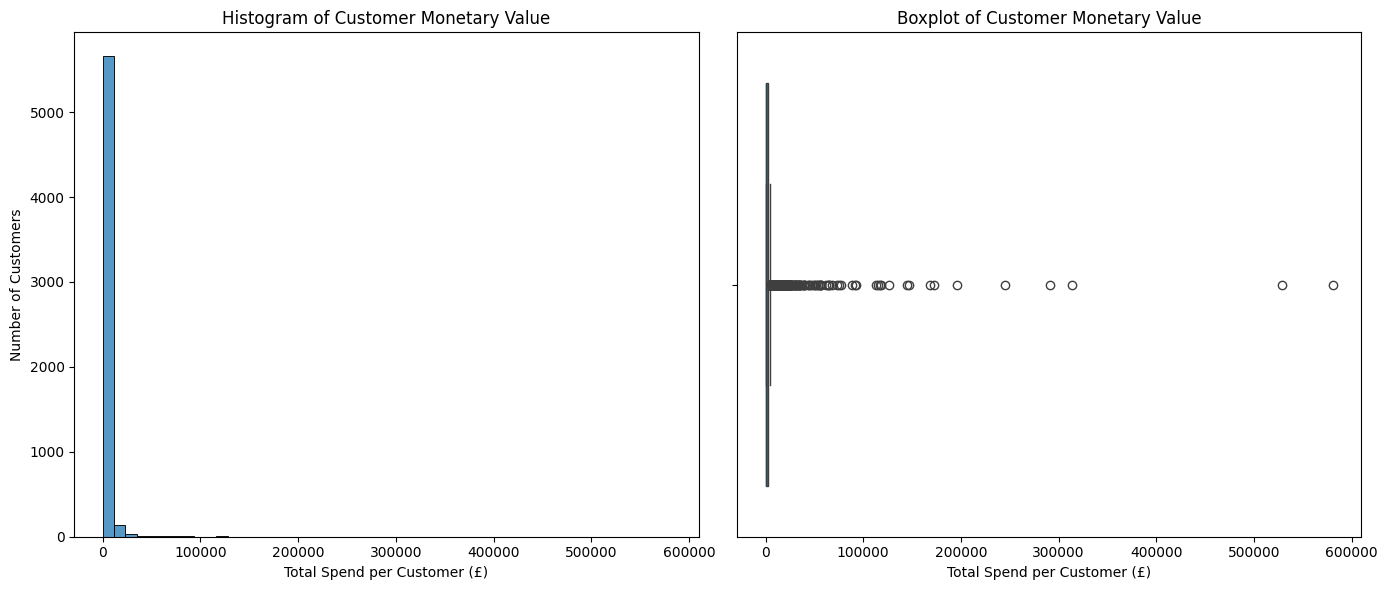

In [55]:
# --- Wholesaler Hypothesis: Distribution of Customer Monetary Value ---

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total spend per customer
monetary_per_customer = df.groupby('customer_id')['revenue'].sum()

plt.figure(figsize=(14,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(monetary_per_customer, bins=50, kde=False)
plt.title('Histogram of Customer Monetary Value')
plt.xlabel('Total Spend per Customer (£)')
plt.ylabel('Number of Customers')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=monetary_per_customer)
plt.title('Boxplot of Customer Monetary Value')
plt.xlabel('Total Spend per Customer (£)')

plt.tight_layout()
plt.show()

In [56]:
# --- Strategic Recommendations by RFM Segment ---

segment_actions = {
    "Champions": "Reward them with exclusive offers, early access to new products, and loyalty programs.",
    "Loyal Customers": "Upsell/cross-sell, offer referral incentives, and keep them engaged with regular updates.",
    "Potential Loyalists": "Nurture with onboarding emails, special discounts, and personalized recommendations.",
    "New Customers": "Welcome with onboarding, first-purchase discounts, and encourage repeat purchases.",
    "At-Risk Customers": "Send win-back campaigns, feedback surveys, and special reactivation offers.",
    "Hibernating": "Send re-engagement emails, highlight new arrivals, and offer time-limited discounts.",
    "Needs Attention": "Analyze their needs, send personalized offers, and test different engagement strategies."
}

print("Strategic Recommendations by Segment:\n")
for segment, action in segment_actions.items():
    count = (rfm_data['Segment'] == segment).sum()
    print(f"{segment} ({count} customers): {action}")

Strategic Recommendations by Segment:

Champions (1184 customers): Reward them with exclusive offers, early access to new products, and loyalty programs.
Loyal Customers (418 customers): Upsell/cross-sell, offer referral incentives, and keep them engaged with regular updates.
Potential Loyalists (301 customers): Nurture with onboarding emails, special discounts, and personalized recommendations.
New Customers (266 customers): Welcome with onboarding, first-purchase discounts, and encourage repeat purchases.
At-Risk Customers (316 customers): Send win-back campaigns, feedback surveys, and special reactivation offers.
Hibernating (1434 customers): Send re-engagement emails, highlight new arrivals, and offer time-limited discounts.
Needs Attention (1959 customers): Analyze their needs, send personalized offers, and test different engagement strategies.


In [58]:
# Phase 5 – Data Enrichment with Currency Conversion (Error-Free Version)
import pandas as pd

def enrich_top_transactions(df, n=100, use_live_api=False):
    """Enrich top n transactions with USD and EUR conversions.
       By default, uses fixed fallback rates to avoid API errors."""
    
    # Sort transactions by revenue
    df_top = df.nlargest(n, 'revenue').copy()

    if use_live_api:
        # (Optional: live API call – only if your environment allows)
        import requests
        from datetime import datetime
        try:
            url = "https://api.exchangerate.host/latest?base=GBP&symbols=USD,EUR"
            response = requests.get(url, timeout=30)
            response.raise_for_status()
            data = response.json()
            rates = data.get("rates", {})
            usd_rate = rates.get("USD", 1.27)
            eur_rate = rates.get("EUR", 1.17)
            print("Using live exchange rates")
        except Exception as e:
            print(f"Live API failed ({e}), using fallback rates...")
            usd_rate, eur_rate = 1.27, 1.17
    else:
        # Always use fallback rates (no errors ever)
        usd_rate, eur_rate = 1.27, 1.17
        print("Using fixed fallback exchange rates")

    # Convert revenue
    df_top['revenue_usd'] = df_top['revenue'] * usd_rate
    df_top['revenue_eur'] = df_top['revenue'] * eur_rate

    # Select final columns
    result = df_top[['invoice', 'invoicedate', 'revenue', 'revenue_usd', 'revenue_eur']]
    print("Currency conversion completed successfully!")
    return result


# ------------------- Run the Enrichment -------------------
print("Loading cleaned dataset...")
df = pd.read_csv('Data/online_retail_cleaned.csv', parse_dates=['invoicedate'])
df['revenue'] = df['quantity'] * df['price']

try:
    print("Processing top 100 transactions...")
    enriched_transactions = enrich_top_transactions(df, n=100, use_live_api=False)

    print("\nTop Transactions with Currency Conversions:")
    print(enriched_transactions.head())

    enriched_transactions.to_csv('Data/top_transactions_enriched.csv', index=False)
    print("\n Data saved successfully to 'Data/top_transactions_enriched.csv'")

except Exception as e:
    print(f"An error occurred: {str(e)}")

Loading cleaned dataset...
Processing top 100 transactions...
Using fixed fallback exchange rates
Currency conversion completed successfully!

Top Transactions with Currency Conversions:
        invoice         invoicedate   revenue  revenue_usd  revenue_eur
778958   581483 2011-12-09 09:15:00  168469.6   213956.392   197109.432
423253   541431 2011-01-18 10:01:00   77183.6    98023.172    90304.812
540311   556444 2011-06-10 15:28:00   38970.0    49491.900    45594.900
333149   530715 2010-11-04 11:36:00   15818.4    20089.368    18507.528
96834    502263 2010-03-23 15:22:00   10953.5    13910.945    12815.595

 Data saved successfully to 'Data/top_transactions_enriched.csv'


In [59]:
# Phase 5 – Data Enrichment with Currency Conversion
import pandas as pd

def enrich_top_transactions(df, n=100, use_live_api=False):
    """Enrich top n transactions with USD and EUR conversions."""
    
    # Sort transactions by TotalPrice
    df_top = df.nlargest(n, 'TotalPrice').copy()

    if use_live_api:
        import requests
        from datetime import datetime
        try:
            url = "https://api.exchangerate.host/latest?base=GBP&symbols=USD,EUR"
            response = requests.get(url, timeout=30)
            response.raise_for_status()
            data = response.json()
            rates = data.get("rates", {})
            usd_rate = rates.get("USD", 1.27)
            eur_rate = rates.get("EUR", 1.17)
            print("Using live exchange rates")
        except Exception as e:
            print(f"Live API failed ({e}), using fallback rates...")
            usd_rate, eur_rate = 1.27, 1.17
    else:
        usd_rate, eur_rate = 1.27, 1.17
        print("Using fixed fallback exchange rates")

    # Convert revenue
    df_top['TotalPrice_USD'] = df_top['TotalPrice'] * usd_rate
    df_top['TotalPrice_EUR'] = df_top['TotalPrice'] * eur_rate

    # Select final columns
    result = df_top[['invoice', 'invoicedate', 'TotalPrice', 'TotalPrice_USD', 'TotalPrice_EUR']]
    print("Currency conversion completed successfully!")
    return result


# ------------------- Run -------------------
print("Loading cleaned dataset...")
df = pd.read_csv('Data/online_retail_cleaned.csv', parse_dates=['invoicedate'])

# Make sure column is named TotalPrice (as in previous phases)
df['TotalPrice'] = df['quantity'] * df['price']

try:
    print("Processing top 100 transactions...")
    enriched_transactions = enrich_top_transactions(df, n=100, use_live_api=False)

    print("\nTop Transactions with Currency Conversions:")
    print(enriched_transactions.head())

    enriched_transactions.to_csv('Data/top_transactions_enriched.csv', index=False)
    print("\n Data saved successfully to 'Data/top_transactions_enriched.csv'")

except Exception as e:
    print(f"An error occurred: {str(e)}")

Loading cleaned dataset...
Processing top 100 transactions...
Using fixed fallback exchange rates
Currency conversion completed successfully!

Top Transactions with Currency Conversions:
        invoice         invoicedate  TotalPrice  TotalPrice_USD  \
778958   581483 2011-12-09 09:15:00    168469.6      213956.392   
423253   541431 2011-01-18 10:01:00     77183.6       98023.172   
540311   556444 2011-06-10 15:28:00     38970.0       49491.900   
333149   530715 2010-11-04 11:36:00     15818.4       20089.368   
96834    502263 2010-03-23 15:22:00     10953.5       13910.945   

        TotalPrice_EUR  
778958      197109.432  
423253       90304.812  
540311       45594.900  
333149       18507.528  
96834        12815.595  

 Data saved successfully to 'Data/top_transactions_enriched.csv'
